In [3]:
%%writefile /home/drueda/pylearn2/pylearn2-datasets/mnist/mnist_conv.yaml

!obj:pylearn2.train.Train {
    dataset: &train !obj:pylearn2.datasets.mnist.MNIST {
        which_set: 'train',
        start: 0,
        stop: 50000
    },
    model: !obj:pylearn2.models.mlp.MLP {
        batch_size: 100,
        input_space: !obj:pylearn2.space.Conv2DSpace {
            shape: [28, 28],
            num_channels: 1
        },
        layers: [ !obj:pylearn2.models.mlp.ConvRectifiedLinear {
                     layer_name: 'h2',
                     output_channels: 64,
                     irange: .05,
                     kernel_shape: [5, 5],
                     pool_shape: [4, 4],
                     pool_stride: [2, 2],
                     max_kernel_norm: 1.9365
                 }, !obj:pylearn2.models.mlp.ConvRectifiedLinear {
                     layer_name: 'h3',
                     output_channels: 64,
                     irange: .05,
                     kernel_shape: [5, 5],
                     pool_shape: [4, 4],
                     pool_stride: [2, 2],
                     max_kernel_norm: 1.9365
                 }, !obj:pylearn2.models.mlp.Softmax {
                     max_col_norm: 1.9365,
                     layer_name: 'y',
                     n_classes: 10,
                     istdev: .05
                 }
                ],
    },
    algorithm: !obj:pylearn2.training_algorithms.sgd.SGD {
        batch_size: 100,
        learning_rate: .01,
        learning_rule: !obj:pylearn2.training_algorithms.learning_rule.Momentum {
            init_momentum: 0.5,
        },
        monitoring_dataset:
            {
                'valid' : !obj:pylearn2.datasets.mnist.MNIST {
                              which_set: 'train',
                              start: 50000,
                              stop:  60000
                          },
                'test'  : !obj:pylearn2.datasets.mnist.MNIST {
                              which_set: 'test',
                              stop: 10000
                          }
            },
        cost: !obj:pylearn2.costs.cost.SumOfCosts { costs: [
            !obj:pylearn2.costs.cost.MethodCost {
                method: 'cost_from_X'
            }, !obj:pylearn2.costs.mlp.WeightDecay {
                coeffs: [ .00005, .00005, .00005 ]
            }
            ]
        },
        termination_criterion: !obj:pylearn2.termination_criteria.And {
            criteria: [
                !obj:pylearn2.termination_criteria.MonitorBased {
                    channel_name: "valid_y_misclass",
                    prop_decrease: 0.50,
                    N: 10
                },
                !obj:pylearn2.termination_criteria.EpochCounter {
                    max_epochs: 500
                },
            ]
        },
    },
    extensions:
        [ !obj:pylearn2.train_extensions.best_params.MonitorBasedSaveBest {
             channel_name: 'valid_y_misclass',
             save_path: "../mnist/mnist_convolutional_network_best.pkl"
        }, !obj:pylearn2.training_algorithms.learning_rule.MomentumAdjustor {
            start: 1,
            saturate: 10,
            final_momentum: .99
        }
    ]
}
 

Overwriting /home/drueda/pylearn2/pylearn2-datasets/mnist/mnist_conv.yaml


In [4]:
train = open('../mnist/mnist_conv.yaml', 'r').read()
train_params = {'train_stop': 50000,
                    'valid_stop': 60000,
                    'test_stop': 10000,
                    'batch_size': 100,
                    'output_channels_h2': 64, 
                    'output_channels_h3': 64,  
                    'max_epochs': 500,
                    'save_path': '../mnist/mnist_convolutional_network_best.pkl'}
train = train % (train_params)

In [5]:
from pylearn2.config import yaml_parse
train = yaml_parse.load(train)
train.main_loop()

Input shape: (28, 28)


Using gpu device 0: Tesla M2075


Detector space: (24, 24)
Output space: (11, 11)
Input shape: (11, 11)
Detector space: (7, 7)
Output space: (3, 3)
Parameter and initial learning rate summary:


/home/drueda/pylearn2/pylearn2/costs/mlp/__init__.py:105: UserWarning: Coefficients should be given as a dictionary with layer names as key. The support of coefficients as list would be deprecated from 03/06/2015
  warnings.warn("Coefficients should be given as a dictionary "


	h2_W: 0.00999999977648
	h2_b: 0.00999999977648
	h3_W: 0.00999999977648
	h3_b: 0.00999999977648
	softmax_b: 0.00999999977648
	softmax_W: 0.00999999977648
Compiling sgd_update...
Compiling sgd_update done. Time elapsed: 14.258578 seconds
compiling begin_record_entry...
compiling begin_record_entry done. Time elapsed: 0.484586 seconds
Monitored channels: 
	learning_rate
	momentum
	test_h2_kernel_norms_max
	test_h2_kernel_norms_mean
	test_h2_kernel_norms_min
	test_h2_max_x_max_u
	test_h2_max_x_mean_u
	test_h2_max_x_min_u
	test_h2_mean_x_max_u
	test_h2_mean_x_mean_u
	test_h2_mean_x_min_u
	test_h2_min_x_max_u
	test_h2_min_x_mean_u
	test_h2_min_x_min_u
	test_h2_range_x_max_u
	test_h2_range_x_mean_u
	test_h2_range_x_min_u
	test_h3_kernel_norms_max
	test_h3_kernel_norms_mean
	test_h3_kernel_norms_min
	test_h3_max_x_max_u
	test_h3_max_x_mean_u
	test_h3_max_x_min_u
	test_h3_mean_x_max_u
	test_h3_mean_x_mean_u
	test_h3_mean_x_min_u
	test_h3_min_x_max_u
	test_h3_min_x_mean_u
	test_h3_min_x_min_u
	

/home/drueda/pylearn2/pylearn2/datasets/dense_design_matrix.py:1478: UserWarning: It looks like DefaultViewConverter.axes has been changed directly, please use the set_axes() method instead.
  "instead." % self.__class__.__name__)


	Epochs seen: 0
	Batches seen: 0
	Examples seen: 0
	learning_rate: 0.00999999046326
	momentum: 0.499999672174
	test_h2_kernel_norms_max: 0.166490152478
	test_h2_kernel_norms_mean: 0.141212999821
	test_h2_kernel_norms_min: 0.121112905443
	test_h2_max_x_max_u: 0.378474712372
	test_h2_max_x_mean_u: 0.133443593979
	test_h2_max_x_min_u: 1.18065472634e-05
	test_h2_mean_x_max_u: 0.239902764559
	test_h2_mean_x_mean_u: 0.049892000854
	test_h2_mean_x_min_u: 1.18065472066e-07
	test_h2_min_x_max_u: 0.107494473457
	test_h2_min_x_mean_u: 0.00172649708111
	test_h2_min_x_min_u: 0.0
	test_h2_range_x_max_u: 0.37638771534
	test_h2_range_x_mean_u: 0.131717115641
	test_h2_range_x_min_u: 1.18065472634e-05
	test_h3_kernel_norms_max: 1.18473744392
	test_h3_kernel_norms_mean: 1.15763354301
	test_h3_kernel_norms_min: 1.12533462048
	test_h3_max_x_max_u: 0.404753625393
	test_h3_max_x_mean_u: 0.152749031782
	test_h3_max_x_min_u: 0.0
	test_h3_mean_x_max_u: 0.302150309086
	test_h3_mean_x_mean_u: 0.0853193327785
	tes

In [8]:
!/home/drueda/anaconda/bin/python2.7 /home/drueda/pylearn2/pylearn2/scripts/show_weights.py convolutional_network_best.pkl --out weights_mnist_conv.jpg

Using gpu device 0: Tesla M2075
making weights report
loading model
loading done
smallest enc weight magnitude: 6.89588923706e-05
mean enc weight magnitude: 0.0658324882388
max enc weight magnitude: 0.277983695269


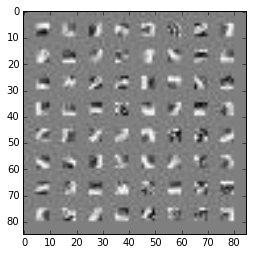

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

img=mpimg.imread('weights_mnist_conv.jpg')

plt.imshow(img)
plt.show()